In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "HR"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/baseline

Average verified rate: 0.9381916199487721

Average of error rates: 0.07917422477146442

Total token count: 14244185



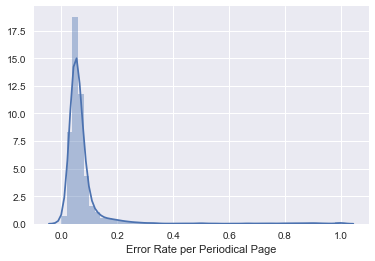

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 500 )

[('ñ', 30042),
 ('m', 15023),
 ('-', 14921),
 ('¥', 11779),
 ("'", 11243),
 ('d', 11089),
 ('tion', 9128),
 ('e', 8622),
 ('in-', 7649),
 ('con-', 7490),
 ('re-', 7387),
 ('t', 6864),
 ('w', 6692),
 ('f', 6658),
 ('r', 6358),
 (')', 6073),
 ('co', 5713),
 ('n', 5464),
 ('ex-', 4718),
 ('de-', 4140),
 ('be-', 4091),
 ('ò', 4035),
 ('ment', 3835),
 ('dis-', 3773),
 ('pm', 3748),
 ('ó', 3558),
 ('com-', 3444),
 ('(', 3333),
 ('g', 3071),
 ('ñthe', 2992),
 ('pro-', 2715),
 ('tions', 2609),
 ('un-', 2592),
 ('per-', 2445),
 ('¡', 2260),
 ('*', 2073),
 ('ña', 2049),
 ('im-', 2045),
 ('en-', 1973),
 ('pre-', 1951),
 ('al-', 1711),
 ('ac-', 1652),
 ('ap-', 1646),
 ('th', 1631),
 ('ments', 1583),
 ('sub-', 1572),
 ('ful', 1506),
 ('u', 1499),
 ('ad-', 1368),
 ('/', 1340),
 ('ble', 1324),
 ('k', 1306),
 ('ous', 1265),
 ('_', 1261),
 ('x', 1212),
 ('an-', 1115),
 ('ers', 1112),
 ('at-', 1073),
 ('to-', 1046),
 ('di-', 1036),
 ('ture', 1015),
 ('ence', 1008),
 ('--', 982),
 ('ical', 975),
 ('some-

## Review Special Characters

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:150]

[('ñ', 30042),
 ('¥', 11779),
 (')', 6073),
 ('ò', 4035),
 ('ó', 3558),
 ('(', 3333),
 ('ñthe', 2992),
 ('¡', 2260),
 ('*', 2073),
 ('ña', 2049),
 ('/', 1340),
 ('_', 1261),
 ('%', 726),
 ('ô', 570),
 ('ñit', 563),
 ('=', 562),
 ('¥¥', 540),
 ('•', 516),
 ('**', 489),
 ('ã', 484),
 (']', 482),
 ('ñsel', 469),
 ('(m)', 440),
 ('ñan', 421),
 ('ñin', 416),
 ('\\', 391),
 ('(the', 374),
 ('ñdr', 366),
 ('(to', 350),
 ('õ', 334),
 ('ñwe', 323),
 ('***', 312),
 ('(illustrated)', 311),
 ('ñthis', 304),
 ('ñand', 277),
 ('¥¥¥', 258),
 ('ñno', 258),
 ('`', 254),
 ('(new)', 251),
 ('ñj', 250),
 ('ñthere', 235),
 ('(a', 234),
 ('(see', 230),
 ('o¡', 218),
 ('ñmrs', 218),
 ('(poetry)', 217),
 ('ñhow', 206),
 ('(and', 194),
 ('(or', 191),
 ('(no', 177),
 ('ñone', 176),
 ('ñthat', 174),
 ('ñto', 165),
 ('ñi', 165),
 ('(which', 163),
 ('ñm', 161),
 ('+', 157),
 ('[', 153),
 ('(bulk', 151),
 ('ñprof', 147),
 ('(new', 144),
 ('(not', 144),
 ('(in', 140),
 ('\ufeff', 139),
 ('(fig', 139),
 ('[the', 135)

## Correction 1 -- Replace "õ" with "'"

In [13]:
# %load shared_elements/replace_accented_o.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    with open(join(directories['prev'], filename)) as f:
        content = f.read()
        
    content = re.sub(r"(\w+)(õ|Õ)", r"\1'", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction1

Average verified rate: 0.9383412950618094

Average of error rates: 0.07905354902312242

Total token count: 14244185



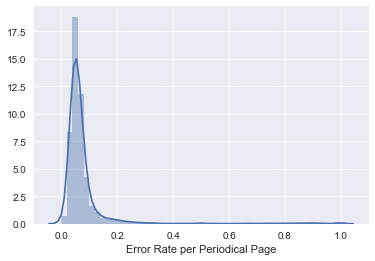

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('ñ', 30042),
 ('m', 15023),
 ('-', 14921),
 ('¥', 11779),
 ("'", 11245),
 ('d', 11089),
 ('tion', 9128),
 ('e', 8622),
 ('in-', 7649),
 ('con-', 7490),
 ('re-', 7387),
 ('t', 6864),
 ('w', 6692),
 ('f', 6658),
 ('r', 6358),
 (')', 6073),
 ('co', 5713),
 ('n', 5464),
 ('ex-', 4718),
 ('de-', 4140),
 ('be-', 4091),
 ('ò', 4035),
 ('ment', 3835),
 ('dis-', 3773),
 ('pm', 3748),
 ('ó', 3558),
 ('com-', 3444),
 ('(', 3333),
 ('g', 3071),
 ('ñthe', 2992),
 ('pro-', 2715),
 ('tions', 2609),
 ('un-', 2592),
 ('per-', 2445),
 ('¡', 2260),
 ('*', 2073),
 ('ña', 2049),
 ('im-', 2045),
 ('en-', 1973),
 ('pre-', 1951),
 ('al-', 1711),
 ('ac-', 1652),
 ('ap-', 1646),
 ('th', 1631),
 ('ments', 1583),
 ('sub-', 1572),
 ('ful', 1506),
 ('u', 1499),
 ('ad-', 1368),
 ('/', 1340)]

## Correction 2 -- Normalize Characters

In [16]:
# %load shared_elements/normalize_characters.py
prev = "correction1"
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction2

Average verified rate: 0.9474700623950211

Average of error rates: 0.06657375873812511

Total token count: 14185587



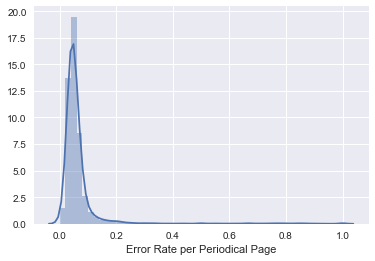

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 16542),
 ('m', 15895),
 ("'", 12059),
 ('d', 11280),
 ('tion', 9178),
 ('e', 9129),
 ('in-', 7668),
 ('con-', 7499),
 ('t', 7473),
 ('re-', 7402),
 ('w', 7034),
 ('f', 7023),
 ('r', 6884),
 ('n', 5856),
 ('co', 5797),
 ('ex-', 4725),
 ('de-', 4151),
 ('be-', 4103),
 ('ment', 3847),
 ('dis-', 3776),
 ('pm', 3757),
 ('com-', 3446),
 ('g', 3224),
 ('pro-', 2720),
 ('tions', 2617),
 ('un-', 2601),
 ('per-', 2451),
 ('im-', 2045),
 ('en-', 1988),
 ('pre-', 1951),
 ('al-', 1715),
 ('th', 1682),
 ('ap-', 1663),
 ('ac-', 1662),
 ('ments', 1591),
 ('sub-', 1573),
 ('u', 1549),
 ('ful', 1511),
 ('k', 1435),
 ('ad-', 1369),
 ('ble', 1342),
 ('x', 1294),
 ('ous', 1266),
 ('--', 1229),
 ('an-', 1118),
 ('ers', 1118),
 ('at-', 1074),
 ('to-', 1052),
 ('di-', 1036),
 ('ture', 1024)]

## Correction 3 -- Fix Line Endings

In [19]:
# %load shared_elements/correct_line_endings.py
prev = "correction2"
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction3

Average verified rate: 0.9741713414931088

Average of error rates: 0.041146666069188036

Total token count: 13922442



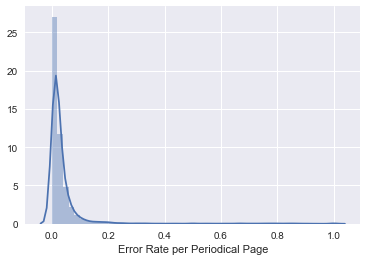

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 16407),
 ('m', 15881),
 ("'", 12059),
 ('d', 11272),
 ('e', 9110),
 ('t', 7413),
 ('w', 7028),
 ('f', 7003),
 ('r', 6863),
 ('n', 5849),
 ('co', 5770),
 ('pm', 3757),
 ('g', 3217),
 ('th', 1681),
 ('u', 1545),
 ('k', 1431),
 ('x', 1293),
 ('--', 1229),
 ('tion', 1003),
 ('re', 876),
 ('ex', 773),
 ('z', 764),
 ('mo', 747),
 ('pa', 659),
 ('sel', 655),
 ("an'", 558),
 ("'s", 544),
 ('lb', 500),
 ('pp', 475),
 ('al', 471),
 ('ment', 447),
 ('oz', 445),
 ('wm', 354),
 ('mc', 339),
 ('ti', 325),
 ('re-', 318),
 ('q', 304),
 ('---', 298),
 ('tions', 293),
 ('ft', 277),
 ("'t", 272),
 ('se', 270),
 ('ro', 266),
 ('io', 254),
 ('es', 253),
 ('un', 247),
 ('oo', 244),
 ('pt', 241),
 ("'the", 241),
 ('mt', 240)]

## Correction 4 -- Remove Extra Dashes

In [22]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction3"
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction4

Average verified rate: 0.9767487018539854

Average of error rates: 0.03690231224233734

Total token count: 13925244



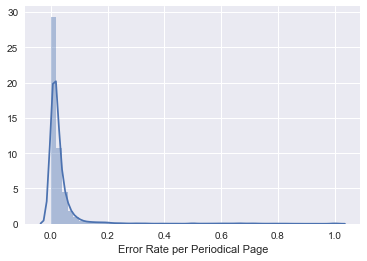

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 15989),
 ("'", 12451),
 ('d', 11322),
 ('e', 9321),
 ('t', 7609),
 ('f', 7097),
 ('r', 7093),
 ('w', 7092),
 ('n', 5918),
 ('co', 5858),
 ('pm', 3761),
 ('g', 3281),
 ('th', 1690),
 ('u', 1555),
 ('k', 1463),
 ('x', 1343),
 ('re', 1277),
 ('tion', 1006),
 ('ex', 937),
 ('z', 832),
 ('mo', 760),
 ('oz', 677),
 ('pa', 676),
 ('sel', 665),
 ("an'", 558),
 ("'s", 544),
 ('lb', 533),
 ('al', 520),
 ('pp', 475),
 ('ment', 449),
 ('-', 424),
 ('wm', 355),
 ('ti', 355),
 ('mc', 351),
 ('q', 316),
 ('un', 313),
 ('tions', 293),
 ('se', 287),
 ('ft', 286),
 ('pre', 274),
 ("'t", 274),
 ('es', 273),
 ('ro', 272),
 ('io', 259),
 ("''", 250),
 ('pt', 244),
 ('oo', 244),
 ('mt', 243),
 ("'the", 241),
 ('ry', 226)]

## Correction 5 -- Remove extra quotation marks

In [25]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction4"
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction5

Average verified rate: 0.9771528524967492

Average of error rates: 0.03617063989962359

Total token count: 13925327



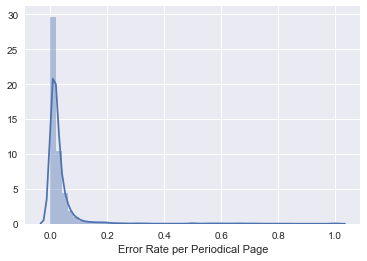

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 16115),
 ('d', 11423),
 ("'", 11285),
 ('e', 9354),
 ('t', 8191),
 ('r', 7147),
 ('f', 7111),
 ('w', 7107),
 ('n', 6132),
 ('co', 5859),
 ('pm', 3762),
 ('g', 3283),
 ('th', 1692),
 ('u', 1561),
 ('k', 1466),
 ('x', 1344),
 ('re', 1331),
 ('tion', 1006),
 ('ex', 940),
 ('z', 836),
 ('mo', 760),
 ('pa', 677),
 ('oz', 677),
 ('sel', 665),
 ("an'", 555),
 ('lb', 536),
 ('al', 525),
 ('pp', 475),
 ('ment', 450),
 ('-', 426),
 ('ti', 358),
 ('wm', 355),
 ('mc', 351),
 ('em', 325),
 ('q', 319),
 ('un', 316),
 ('tions', 293),
 ('ft', 291),
 ('se', 287),
 ('es', 276),
 ('pre', 274),
 ('ro', 273),
 ('io', 259),
 ('oo', 249),
 ('pt', 244),
 ('mt', 244),
 ('il', 227),
 ('ry', 226),
 ('li', 222),
 ('ll', 221)]

## Correction 6 -- Rejoin Burst Words

In [28]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction5"
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

HR18660801-V01-01-page1.txt: [('\nT e r m s ', 'Terms')]
HR18660801-V01-01-page15.txt: [('\nT e r m s ', 'Terms')]
HR18660801-V01-01-page21.txt: [('\nC e l e r y ', 'Celery')]
HR18660801-V01-01-page7.txt: [('\nC e l e r y ', 'Celery')]
HR18660901-V01-02-page1.txt: [(' G e s e n i u s ', 'Gesenius'), (' h a m a h ', 'hamah')]
HR18660901-V01-02-page12.txt: [(' R e f o r m e r ', 'Reformer')]
HR18660901-V01-02-page13.txt: [(' W a n t e d ', 'Wanted')]
HR18660901-V01-02-page14.txt: [(' Ca n r ig h t ', 'Canright')]
HR18660901-V01-02-page16.txt: [('\nDe f ic ie n t ', 'Deficient')]
HR18660901-V01-02-page2.txt: [(' B u t t e r ', 'Butter'), (' B u t t e r ', 'Butter')]
HR18660901-V01-02-page3.txt: [(' R e f o r m e r ', 'Reformer')]
HR18661001-V01-03-page1.txt: [('\nT e r m s ', 'Terms')]
HR18661101-V01-04-page1.txt: [(' E D IT O R ', 'EDITOR'), ('\nT e r m s ', 'Terms')]
HR18661101-V01-04-page4.txt: [(' r e f o r m e r ', 'reformer')]
HR18661201-V01-05-page1.txt: [(' E D I T O R ', 'EDITOR'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction6

Average verified rate: 0.9772093399046619

Average of error rates: 0.03611597060405091

Total token count: 13924125



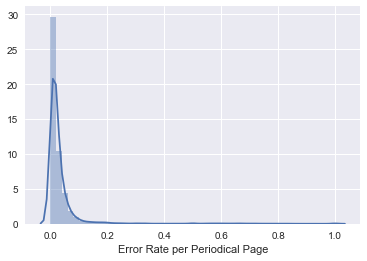

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 16053),
 ('d', 11371),
 ("'", 11286),
 ('e', 9145),
 ('t', 8057),
 ('f', 7096),
 ('w', 7082),
 ('r', 7009),
 ('n', 6039),
 ('co', 5855),
 ('pm', 3762),
 ('g', 3249),
 ('th', 1692),
 ('u', 1518),
 ('k', 1461),
 ('x', 1342),
 ('re', 1330),
 ('tion', 1006),
 ('ex', 939),
 ('z', 836),
 ('mo', 760),
 ('oz', 677),
 ('pa', 676),
 ('sel', 665),
 ("an'", 555),
 ('lb', 536),
 ('al', 524),
 ('pp', 474),
 ('ment', 450),
 ('-', 426),
 ('ti', 358),
 ('wm', 355),
 ('mc', 351),
 ('em', 325),
 ('q', 318),
 ('un', 316),
 ('tions', 293),
 ('ft', 291),
 ('se', 287),
 ('es', 276),
 ('pre', 274),
 ('ro', 273),
 ('io', 258),
 ('oo', 249),
 ('mt', 244),
 ('pt', 243),
 ('ry', 226),
 ('il', 225),
 ('li', 222),
 ('ll', 221)]

## Correction 7 -- Rejoin Split Words

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = "correction6"
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction7

Average verified rate: 0.9782451294859534

Average of error rates: 0.03500528768596523

Total token count: 13914907



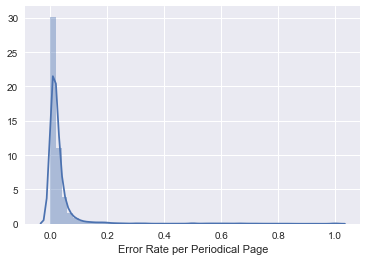

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 16037),
 ('d', 11345),
 ("'", 11286),
 ('e', 8999),
 ('t', 7978),
 ('f', 7087),
 ('w', 7078),
 ('r', 6972),
 ('n', 5982),
 ('co', 5734),
 ('pm', 3762),
 ('g', 3229),
 ('th', 1594),
 ('u', 1512),
 ('k', 1449),
 ('x', 1336),
 ('z', 836),
 ('mo', 733),
 ('oz', 677),
 ('sel', 657),
 ('ex', 642),
 ('re', 637),
 ('pa', 604),
 ("an'", 555),
 ('lb', 535),
 ('tion', 527),
 ('pp', 474),
 ('-', 426),
 ('ment', 402),
 ('al', 355),
 ('wm', 355),
 ('q', 317),
 ('ti', 305),
 ('ft', 290),
 ('em', 274),
 ('ro', 259),
 ('io', 251),
 ('oo', 245),
 ('mt', 243),
 ('pt', 241),
 ('se', 236),
 ('es', 229),
 ('ry', 220),
 ('ll', 214),
 ('il', 212),
 ('ia', 193),
 ('tt', 183),
 ('li', 181),
 ("hours'", 180),
 ("''", 171)]

## Correction 8 -- Rejoin Split Words II

In [34]:
# %load shared_elements/rejoin_split_words.py
prev = "correction7"
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction8

Average verified rate: 0.9787064241653848

Average of error rates: 0.03450824520523392

Total token count: 13908655



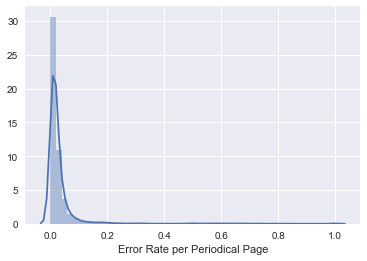

In [35]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [36]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:500]

[('m', 15949),
 ('d', 11327),
 ("'", 11285),
 ('e', 8969),
 ('t', 7931),
 ('f', 7056),
 ('w', 6940),
 ('r', 6925),
 ('n', 5966),
 ('co', 5725),
 ('pm', 3762),
 ('g', 3208),
 ('th', 1569),
 ('u', 1506),
 ('k', 1445),
 ('x', 1336),
 ('z', 834),
 ('mo', 723),
 ('oz', 676),
 ('sel', 657),
 ('ex', 624),
 ('pa', 603),
 ("an'", 555),
 ('lb', 535),
 ('tion', 489),
 ('pp', 474),
 ('re', 465),
 ('-', 426),
 ('wm', 355),
 ('q', 316),
 ('al', 312),
 ('ti', 298),
 ('ft', 280),
 ('em', 267),
 ('io', 251),
 ('ro', 250),
 ('ment', 248),
 ('mt', 243),
 ('pt', 240),
 ('oo', 239),
 ('ry', 215),
 ('es', 203),
 ('il', 200),
 ('ll', 188),
 ('se', 185),
 ('ia', 183),
 ('tt', 181),
 ("hours'", 180),
 ('li', 178),
 ("''", 171),
 ('vt', 167),
 ('tri', 165),
 ('si', 159),
 ('op', 157),
 ('ma', 153),
 ('zo', 151),
 ('ne', 150),
 ('fl', 143),
 ("of'", 143),
 ('tions', 142),
 ('gr', 141),
 ('te', 140),
 ('deimel', 140),
 ('keeley', 139),
 ('mc', 138),
 ('ni', 137),
 ('un', 136),
 ('ch', 135),
 ('ve', 134),
 ('va', 

## Review Remaining Errors

In [37]:
GoH.reports.docs_with_high_error_rate(summary)[:100]

[('HR18920501-V27-05-page3.txt', 1.0),
 ('HR18940101-V29-01-page3.txt', 1.0),
 ('HR18900101-V25-01-page1.txt', 1.0),
 ('HR18910401-V26-04-page3.txt', 1.0),
 ('HR18940301-V29-03-page3.txt', 1.0),
 ('HR19030701-V38-07-page6.txt', 1.0),
 ('HR18920801-V27-08-page3.txt', 1.0),
 ('HR18890601-V24-06-page1.txt', 1.0),
 ('HR18931101-V28-11-page3.txt', 1.0),
 ('HR19040701-V39-07-page2.txt', 1.0),
 ('HR19030501-V38-05-page4.txt', 1.0),
 ('HR18911201-V26-12-page1.txt', 1.0),
 ('HR18971001-V32-10-page3.txt', 1.0),
 ('HR18941201-V29-12-page3.txt', 1.0),
 ('HR18970401-V32-04-page4.txt', 1.0),
 ('HR18911001-V26-10-page3.txt', 1.0),
 ('HR18991001-V34-10-page4.txt', 1.0),
 ('HR18880301-V23-03-page12.txt', 1.0),
 ('HR18890501-V24-05-page3.txt', 1.0),
 ('HR19040301-V39-03-page4.txt', 1.0),
 ('HR18980801-V33-08-page8.txt', 1.0),
 ('HR18890401-V24-04-page1.txt', 1.0),
 ('HR18970901-V32-09-page9.txt', 1.0),
 ('HR18870201-V22-02-page8.txt', 1.0),
 ('HR18990401-V34-04-page4.txt', 1.0),
 ('HR19041101-V39-11-pag

In [38]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['sendforcircularsof',
  'consumersvgetadanufaeturingen',
  'somethingelseifications',
  "introductionoftempei'ancetextbooksinto",
  'oneofthegreatcausesofdesire',
  'thatthesepeoplehave',
  'good-for-nothings',
  'fifteen-per-cent',
  'tsaekceoszspiifcytuourews',
  'ifeelthaticanneverfor',
  'ordrawnfromthestill',
  'force-production',
  'ericanmotherhood',
  'anothergentlemanby',
  "thendon'tsaywehavelostevery",
  'andnotstandbyandseeothersdothem',
  'iiscienceinmehouserold',
  'dyspepsiaproducing',
  'thisisoneofthemost',
  'andallmaypartakeofthebene',
  'acorrectposition',
  'environpurchased',
  'medicallmissionary',
  'someothersingulardisease',
  'iftruehappinessistheresult',
  'semi-occasionally',
  'daintily-broiled',
  'poison-factories',
  "injurious'effects",
  'well-authenticated',
  'andthatitisvastlybettertopay',
  'corset-fashioned',
  'intezreissintheanpyubvlsahye',
  'thuslearnhowtokeepoutofit',
  'other-worldliness',
  'thirst-producing',
  'fairlyuponthehollowplace

## Correction 9 -- Remove long errors strings

In [43]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction8"
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "l|L"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "e|E"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "a|A"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "n|N"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "e|E"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "v|V"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

HR18671101-V02-05-page12.txt: [('EPEIENEERIREESERUEEIENIElli', ' '), ('EPEIENEERIREESERUEEIENIElli', ' ')]
HR18680901-V03-03-page14.txt: [('U.PEINIIVIIINIUIIIII', ' ')]
HR18681201-V03-06-page12.txt: [('IMUMMARIMMINOMMURIMII', ' ')]
HR18681201-V03-06-page2.txt: [('WWINJuniglilliallIMIIIIPPIPIIIINIIMIUTIMPIP"', ' ')]
HR18690101-V03-07-page12.txt: [('OFIIIIIIINIIRIA', ' ')]
HR18701201-V05-06-page8.txt: [('erIwilltellyouallaboutit."I', ' ')]
HR18740401-V09-04-page14.txt: [('P"M"rommmultimmmilmirmongumrmmlwtr.mm.Alloommi."', ' ')]
HR18741001-V09-10-page6.txt: [('PRIIINWRIPPligiPPWrinFRORIPWWTMIIMMIIIMIR', ' ')]
HR18780801-V13-08-page2.txt: [('PIPPIPRIMMIIIMPUMPOPIMMINIIIIIIN', ' ')]
HR18780801-V13-08-page30.txt: [('IMINVIIMPIIIIIIMAgglIgggiggliglIPSYNIMINIMPAPPIlla', ' ')]
HR18800101-V15-01-page1.txt: [('EIMELNIMMILMEMIIIIIIIIIIIIMIKIRIMMIIIIIIIIIII', ' ')]
HR18801201-V15-12-page1.txt: [('.IIIIIIIIIIIIIII', ' ')]
HR18810201-V16-02-page1.txt: [('IIIitIIIIIIIIIII', ' '), ('IIIIIIIIIIIIIIII', 

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction9

Average verified rate: 0.9787164744677069

Average of error rates: 0.034487049650475

Total token count: 13908504



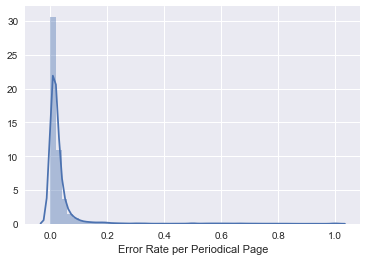

In [44]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [47]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 15948),
 ('d', 11327),
 ("'", 11284),
 ('e', 8969),
 ('t', 7931),
 ('f', 7056),
 ('w', 6939),
 ('r', 6925),
 ('n', 5966),
 ('co', 5725),
 ('pm', 3762),
 ('g', 3208),
 ('th', 1569),
 ('u', 1505),
 ('k', 1445),
 ('x', 1336),
 ('z', 834),
 ('mo', 723),
 ('oz', 676),
 ('sel', 657),
 ('ex', 624),
 ('pa', 603),
 ("an'", 555),
 ('lb', 534),
 ('tion', 489),
 ('pp', 474),
 ('re', 465),
 ('-', 426),
 ('wm', 355),
 ('q', 316),
 ('al', 312),
 ('ti', 298),
 ('ft', 280),
 ('em', 267),
 ('io', 251),
 ('ro', 250),
 ('ment', 248),
 ('mt', 243),
 ('pt', 240),
 ('oo', 239),
 ('ry', 215),
 ('es', 203),
 ('il', 200),
 ('ll', 189),
 ('se', 185),
 ('ia', 183),
 ('tt', 181),
 ("hours'", 180),
 ('li', 178),
 ("''", 171)]

## Correction 9 -- Split Squashed Words

In [50]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

HR18670601-V01-11,12-page28.txt: [('fleshasfoodmustbedecidedly', 'flesh as food must be decidedly')]
HR18670601-V01-11,12-page29.txt: [('anyonedoesyouaninjury', 'anyone does you an injury')]
HR18670601-V01-11,12-page30.txt: [('diseaseandsuddendeathdaughter', 'disease and sudden death daughter'), ('theastonisheddoctor', 'the astonished doctor')]
HR18670601-V01-11,12-page31.txt: [('ifthepowderhadcuredtheboy', 'if the powder had cured the boy'), ('TotheAdvantageopthe', 'To the Advantage opt he')]
HR18670701-V02-01-page1.txt: [('andbyeatinglargely', 'and by eating largely')]
HR18670701-V02-01-page14.txt: [('saidaphysiciantohisser', 'said a physician to his ser')]
HR18670701-V02-01-page15.txt: [('andyoucannnoturgeiton', 'and you c ann not urge it on')]
HR18670701-V02-01-page16.txt: [('readbyfromthreetofivethousandtoeverythou', 'read by from three to five thousand to every thou'), ('andaltogetheritwasa', 'and altogether it was a')]
HR18670701-V02-01-page7.txt: [('aremorelikelytodiscoverthemu

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HR/correction9

Average verified rate: 0.978788437440143

Average of error rates: 0.0343930811973472

Total token count: 13913355



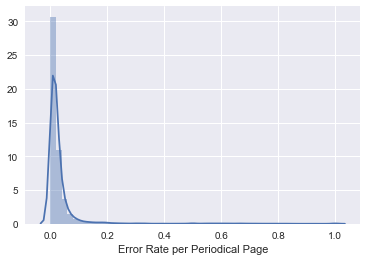

In [51]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [52]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 15959),
 ('d', 11328),
 ("'", 11284),
 ('e', 8989),
 ('t', 7953),
 ('f', 7061),
 ('r', 6946),
 ('w', 6945),
 ('n', 5979),
 ('co', 5725),
 ('pm', 3762),
 ('g', 3213),
 ('th', 1569),
 ('u', 1516),
 ('k', 1449),
 ('x', 1337),
 ('z', 835),
 ('mo', 723),
 ('oz', 676),
 ('sel', 657),
 ('ex', 624),
 ('pa', 603),
 ("an'", 555),
 ('lb', 534),
 ('tion', 489),
 ('pp', 474),
 ('re', 465),
 ('-', 426),
 ('wm', 355),
 ('q', 316),
 ('al', 312),
 ('ti', 298),
 ('ft', 280),
 ('em', 267),
 ('io', 251),
 ('ro', 250),
 ('ment', 248),
 ('mt', 243),
 ('pt', 240),
 ('oo', 239),
 ('ry', 215),
 ('es', 203),
 ('il', 200),
 ('ll', 189),
 ('se', 185),
 ('ia', 183),
 ('tt', 181),
 ("hours'", 180),
 ('li', 178),
 ("''", 171)]